<a href="https://colab.research.google.com/github/Olagrace837/Project-2/blob/main/Exercise%2034_Assignment__PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.lines as mlines

In [2]:
url='https://raw.githubusercontent.com/Olagrace837/Project-2/refs/heads/main/Exercise%2034%20(log).csv'
# Read the CSV without specifying usecols to inspect the actual column names
df = pd.read_csv(url)
print("Actual columns in the CSV:")
print(df.columns.tolist())


Actual columns in the CSV:
['Gene Name', 'Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2', 'KO_3']


In [3]:
df.dropna(inplace = True)
print(df.shape)

(2779, 7)


In [4]:
df


,Gene Name,Control_1,Control_2,Control_3,KO_1,KO_2,KO_3
0,rpoC,24.93804613,24.73252022,23.99412206,24.61324271,24.71040792,24.33101313
1,gdhZ,24.8756305,24.69349206,23.9621695,24.20127502,24.34258798,24.03841937
2,rpoB,24.97193501,24.79758633,23.98354964,24.64130033,24.69013826,24.31534197
3,putA,25.29813558,25.10749231,24.57484757,24.56726493,24.72296592,24.47419808
4,gltB,22.24614909,22.0473343,21.58021808,21.41565513,21.44389661,21.06795685
...,...,...,...,...,...,...,...
2774,CCNA_03985,12.37370802,12.42082869,12.8597483,12.97842447,13.12747852,13.20366918
2775,CCNA_03998,14.33971085,13.89699456,13.29834902,13.52808777,13.74840253,13.17411425
2776,bpt,15.88657777,15.40297873,15.53737009,15.5088161,15.48639511,15.03269149
2777,nuoK,11.85046035,12.29912214,12.7903485,12.53789784,12.63768903,13.58543205


In [6]:
#  Transpose the data (rows = samples, columns = metabolites)
# Correct the numeric columns based on the actual DataFrame columns
numeric_columns = ['Control_1', 'Control_2', 'Control_3', 'KO_1', 'KO_2', 'KO_3']
transposed_data = df[numeric_columns].T
transposed_data.columns = df['Gene Name']  # Optional: set gene names as column headers

In [7]:
#  Create labels
labels = ['Control'] * 3 + ['KO'] * 3

In [8]:
#  Standardize the data
# Convert all columns of transposed_data to numeric, coercing any non-numeric values to NaN
transposed_data_numeric = transposed_data.apply(pd.to_numeric, errors='coerce')

# Drop columns (genes) that contain NaN values introduced by the coercion
# This ensures that only purely numeric data is passed to StandardScaler, while retaining all samples.
transposed_data_numeric.dropna(axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transposed_data_numeric)

In [9]:
#  Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [10]:
# Sample names corresponding to the transposed rows
sample_names = ['Control_1', 'Control_2','Control_3', 'KO_1', 'KO_2','KO_3']

In [11]:
# Define new color map
color_map = {'Control': '#A52A2A', 'KO': '#4169E1'}  # Brown and Royal Blue

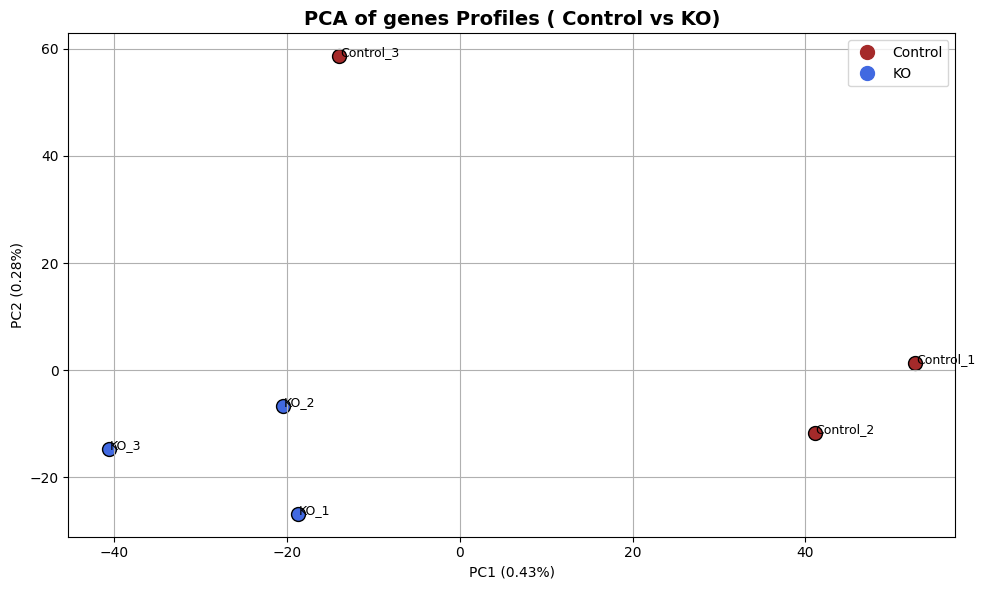

In [12]:
# Plot PCA
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(
        pca_result[i, 0],
        pca_result[i, 1],
        color=color_map[label],
        s=100,
        edgecolor='black'
    )
    # Add text label
    plt.text(
        pca_result[i, 0] + 0.1,  # slight x offset
        pca_result[i, 1],
        sample_names[i],
        fontsize=9
    )

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create custom legend handles
legend_handles = [mlines.Line2D([], [], color=color_map[label], marker='o', linestyle='None', markersize=10, label=label) for label in color_map]

plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')
plt.title('PCA of genes Profiles ( Control vs KO)', fontsize=14, weight='bold')
plt.legend(handles=legend_handles)
plt.grid(True)
plt.tight_layout()
png_path = 'PCA_Metabolites_p den_od_all.png'
pdf_path = 'PCA_Metabolites_p den_od_all.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)

plt.show()